<h1>CNN-LSTM - Processing</h1>

<h5>Importing Packages</h5>

In [ ]:
useKerasTfV1=True
useKerasTfV2=False
useTfV2=False

In [ ]:
try:
    from google.colab import drive
    drive.mount('/drive', force_remount=False)
    %run "/drive/My Drive/Colab Notebooks/Notebooks/Deep Learning/Deep Learning - Processing.ipynb"
except:
    %run "/Google Drive/Colab Notebooks/Notebooks/Deep Learning/Deep Learning - Processing.ipynb"

<h5>Models</h5>

In [ ]:
def model1(n_timestep, n_convolutional, n_features, n_outputs):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, n_convolutional, n_features)))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model, "CNN-LSTM/CNN-LSTM 1"

def model2(n_timestep, n_convolutional, n_features, n_outputs):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, n_convolutional, n_features)))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model, "CNN-LSTM/CNN-LSTM 2"

def model3(n_timestep, n_convolutional, n_features, n_outputs):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, n_convolutional, n_features)))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model, "CNN-LSTM/CNN-LSTM 3"

def model4(n_timestep, n_convolutional, n_features, n_outputs):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, n_convolutional, n_features)))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model, "CNN-LSTM/CNN-LSTM 4"

def model5(n_timestep, n_convolutional, n_features, n_outputs):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu'), input_shape=(None, n_convolutional, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(GlobalAveragePooling1D()))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(LSTM(100, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(LSTM(100, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(LSTM(100))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model, "CNN-LSTM/CNN-LSTM 5"

In [ ]:
def bestModel(n_timestep, n_convolutional, n_features, n_outputs):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu'), input_shape=(None, n_convolutional, n_features)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(SpatialDropout1D(0.15)))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(SpatialDropout1D(0.15)))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(GlobalAveragePooling1D()))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Dropout(0.2)))
    model.add(LSTM(100, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(LSTM(100, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(LSTM(100))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model, "CNN-LSTM/CNN-LSTM Best Model"

In [ ]:
def parameters(input_shape, output_shape):

    return {
        "n_timestep": input_shape[1],
        "n_convolutional": input_shape[2],
        "n_features": input_shape[3],
        "n_outputs": output_shape[1]
    }

<h5>Parameters</h5>

In [ ]:
datasets = getDataSets()

In [ ]:
# sides = ['left']
sides = ['left', 'right']
mode_label = False
# moving_window = True
moving_window = False
fields = experiment_by_fields[2]
subsets = getSubSets(datasets, fields, surface_type_labels)

In [ ]:
# (function, args, scaler name)
scalers = [
    # (getNormalizedDataRobust, None, "robust-scaler"),
    (getNormalizedDataMinMax, (-1,1), "min-max-scaler"),
    # (getNormalizedDataMinMax, (0,1), "min-max-scaler")
]

# input_shape = (None, 8, 32, 7)
# (shape, window size)
input_shapes = [
    ((None, 4, 25, 7), 100), 
    ((None, 6, 25, 7), 150), 
    ((None, 8, 25, 7), 200), 
    ((None, 10, 25, 7), 250), 
    ((None, 12, 25, 7), 300)
]

output_shape = (None, 3)

<h5>Training</h5>

In [ ]:
getLoadBar()

In [ ]:
run(bestModel, patience=50)

In [ ]:
run(model1, patience=50)

In [ ]:
run(model2, patience=50)

In [ ]:
run(model3, patience=50)

In [ ]:
run(model4, patience=50)

In [ ]:
run(model5, patience=50)

<h5>Confusion Matrix - Best Model</h5>

In [ ]:
files = [
    'experiment-1-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.91681-val-acc-0.93676.hdf5',
    'experiment-2-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.98850-val-acc-0.92668.hdf5',
    'experiment-3-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.94164-val-acc-0.91966.hdf5'
]

0.9367635506677141
0.9266777133388566
0.9196574225122349


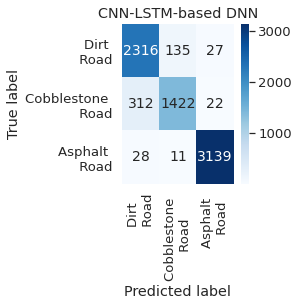

In [ ]:
confusionMatrix(files, "CNN-LSTM-based DNN", bestModel, (None, 12, 25, 7), (None, 3), getNormalizedDataMinMax, (-1,1))

In [ ]:
classificationReport(files, bestModel, (None, 12, 25, 7), (None, 3), getNormalizedDataMinMax, (-1,1))

{'accuracy': 0.9278197517539126,
 'asphalt_road': {'f1-score': 0.9861765629908891,
  'precision': 0.9846298619824341,
  'recall': 0.987728130899937,
  'support': 3178},
 'cobblestone_road': {'f1-score': 0.855595667870036,
  'precision': 0.9068877551020408,
  'recall': 0.8097949886104784,
  'support': 1756},
 'dirt_road': {'f1-score': 0.9022204908453447,
  'precision': 0.8719879518072289,
  'recall': 0.9346246973365617,
  'support': 2478},
 'macro avg': {'f1-score': 0.9146642405687566,
  'precision': 0.9211685229639013,
  'recall': 0.9107159389489924,
  'support': 7412},
 'weighted avg': {'f1-score': 0.9271718141229887,
  'precision': 0.9285529875765883,
  'recall': 0.9278197517539126,
  'support': 7412}}